In [1]:
#|default_exp app

# Indian Art Classifier

In [43]:
#|export
!pip install --upgrade gradio
import timm
from fastai.vision.all import *
import gradio as gr


def add_image_label(x):
    names = ["gond", "kalighat", "kangra", "madhubani", "mandana", "pichwai", "warli"]
    for name in names:
        if name in Path(x).name:
            return name
        elif "kerala" in Path(x).name:
            return "kerala mural"
    return "unknown"

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 4.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 6.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 KB 5.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: ruff
    Found existing installation: ruff 0.2.1
    Uninstalling ruff-0.2.1:
      Successfully uninstalled ruff-0.2.1
  Attempting uninstall: python-multipart
    Found existing installation: python-multipart 0.0.7
    Uninstalling python-multipart-0.0.7:
      Successfully uninstalled python-multipart-0.0.7
  Attempting uninstall: typer
    Found existing installation: typer 0.9.0
    Uninstalling typer-0.9.0:
      Successfully uninstalled typer-0.9.0
  Attempting uninstall: gradio-client
    Found existing installation: gradio_client 0.6.1

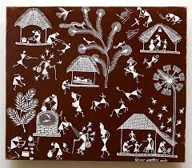

In [37]:
im = PILImage.create("warli.jpeg")
im.thumbnail((192,192))
im

In [38]:
#|export
learn = load_learner("model.pkl")

In [39]:
learn.predict(im)

('warli',
 tensor(7),
 tensor([6.3227e-05, 1.0666e-07, 1.8307e-06, 1.7449e-06, 3.2422e-06, 1.0928e-03,
         1.3041e-04, 9.9871e-01]))

In [40]:
#|export
labels = learn.dls.vocab
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}


In [41]:
predict(im)

{'gond': 6.322679837467149e-05,
 'kalighat': 1.066627604018322e-07,
 'kangra': 1.8306692481928621e-06,
 'kerala mural': 1.7448955986765213e-06,
 'madhubani': 3.242184448026819e-06,
 'mandana': 0.0010927653638646007,
 'pichwai': 0.00013041497732046992,
 'warli': 0.998706579208374}

In [23]:
#|export
image = gr.inputs.Image(type="pil", shape=(192,192))
label = gr.outputs.Label()
examples = ["warli.jpeg"]

intf = gr.Interface(fn=perdict, inputs = image, outputs = label, examples = examples)
intf.launch(inline=False)

AttributeError: module 'gradio' has no attribute 'inputs'

In [48]:
examples = ["warli.jpeg"]
gr.Interface(fn=predict, inputs=gr.Image(type="pil"), outputs=gr.Label(num_top_classes=3), examples = examples, title = "Indian Art Classifier").launch(inline=False)

NotADirectoryError: [Errno 20] Not a directory: 'warli.jpeg'